# व्यायाम २ - शोर का एल्गोरिथम
## ऐतिहासिक पृष्ठभूमि

कंप्यूटिंग में, हम अक्सर एक एल्गोरिथ्म के प्रदर्शन को मापते हैं कि यह इनपुट समस्या के आकार के साथ कैसे बढ़ता है। उदाहरण के लिए, जोड़ में एक एल्गोरिथम होता है जो हमारे द्वारा जोड़ी जा रही संख्याओं के आकार के साथ रैखिक रूप से बढ़ता है। कुछ कंप्यूटिंग समस्याएं हैं जिनके लिए सबसे अच्छा एल्गोरिदम हमने इनपुट के आकार के साथ तेजी से विकसित किया है, और इसका मतलब है कि अपेक्षाकृत मामूली आकार वाले इनपुट पृथ्वी पर किसी भी कंप्यूटर का उपयोग करके हल करने के लिए बहुत बड़े हैं। हम इसके बारे में बहुत आश्वस्त हैं, इंटरनेट की अधिकांश सुरक्षा कुछ समस्याओं के समाधान न होने पर निर्भर करती है।

1994 में, पीटर शोर ने दिखाया कि क्वांटम कंप्यूटर पर कुशलता से किसी संख्या को उसके अभाज्य संख्याओं में कारक बनाना संभव है।[1] यह बड़ी खबर है, जैसा कि हम जानते हैं कि सबसे अच्छा शास्त्रीय एल्गोरिदम इन एल्गोरिदम में से एक है जो तेजी से बढ़ता है। और वास्तव में, [आरएसए एन्क्रिप्शन](https://en.wikipedia.org/wiki/RSA_(cryptosystem)) बड़ी पर्याप्त संख्या के अव्यवहारिक होने के गुणनखंड पर निर्भर करता है। हमारे वर्तमान शास्त्रीय कंप्यूटरों के लिए बहुत बड़े पूर्णांकों को कारक करने के लिए लाखों क्वैबिट और गेट्स की आवश्यकता होगी, और ये सर्किट आज के क्वांटम कंप्यूटरों पर सफलतापूर्वक चलने के लिए बहुत बड़े हैं।

तो लिवेन एम.के. वांडर्सिपेन, मैथियास स्टीफ़न, ग्रेगरी ब्रेटा, कोस्टेंटिनो एस. यानोनी, मार्क एच. शेरवुड और आइज़ैक एल. चुआंग 2001 ने क्वांटम कंप्यूटर पर कारक 15 का प्रबंधन कैसे किया?![2]

शोर के एल्गोरिथ्म के लिए सर्किट बनाने में कठिनाई एक सर्किट बना रही है जो एक नियंत्रित की गणना करता है $ay \bmod N$. जबकि हम जानते हैं कि इन सर्किटों को बहुपद संख्या में फाटकों का उपयोग करके कैसे बनाया जाता है, ये आज के कंप्यूटरों के लिए अभी भी बहुत बड़े हैं। सौभाग्य से, अगर हम समस्या के बारे में कुछ जानकारी को प्राथमिकता से जानते हैं, तो हम कभी-कभी 'धोखा' दे सकते हैं और अधिक कुशल सर्किट बना सकते हैं।

इस सर्किट को उनके लिए उपलब्ध हार्डवेयर पर चलाने के लिए, उपरोक्त पेपर के लेखकों को एक बहुत ही सरल सर्किट मिला जिसने प्रदर्शन किया $7y \bmod 15$. इसने सर्किट को उनके हार्डवेयर पर चलाने के लिए काफी छोटा बना दिया। इस अभ्यास के अंत तक, आप एक सर्किट बनालेंगे $35y \bmod N$ जिसका उपयोग शोर के एल्गोरिथम में किया जा सकता है और `ibmq_santiago` पर चल सकता है।

यदि आप यह समझना चाहते हैं कि इस अभ्यास में क्या हो रहा है, तो आपको [शोर के एल्गोरिथम पर किस्किट पाठ्यपुस्तक पृष्ठ](https://qiskit.org/textbook/ch-algorithms/shor.html) देखना चाहिए, लेकिन यदि यह भी है आपके लिए शामिल है, आप इसके बिना व्यायाम पूरा कर सकते हैं।

### संदर्भ
1. शोर, पीटर डब्ल्यू। "क्वांटम गणना के लिए एल्गोरिदम: असतत लघुगणक और फैक्टरिंग।" कंप्यूटर विज्ञान की नींव पर 35 वीं वार्षिक संगोष्ठी की कार्यवाही। आईईई, 1994।
2. वेंडर्सिपेन, लिवेन एमके, एट अल। "परमाणु चुंबकीय अनुनाद का उपयोग करके शोर के क्वांटम फैक्टरिंग एल्गोरिदम का प्रायोगिक अहसास।" प्रकृति ४१४.६८६६ (२००१): ८८३-८८७।

## टीएल; डॉ: शोर का एल्गोरिदम

एक एल्गोरिथ्म है जिसे कहा जाता है [_क्वांटम चरण अनुमान_](https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html) 
जो हमें उस चरण के बारे में बताता है जो एक गेट एक निश्चित प्रकार की अवस्था का परिचय देता है। उदाहरण के लिए, चरण अनुमान एल्गोरिदम के इनपुट राज्य हो सकते हैं $|1\rangle$ और गेट $Z$. अगर $Z$-gate राज्य $|1\rangle$ पर कार्य करता है, हम $\pi$ के एक अतिरिक्त वैश्विक चरण के साथ उसी स्थिति को वापस प्राप्त करते हैं:

$$
Z|1\rangle = -|1\rangle = e^{i\pi} |1\rangle
$$

और क्वांटम चरण अनुमान एल्गोरिथ्म हमारे लिए यह काम कर सकता है। आप एक और उदाहरण देख सकते हैं [यहां](https://qiskit.org/textbook/ch-algorithms/quantum-phase-estimation.html#2.-Example:-T-gate-).

शोर ने दिखाया कि यदि हम गेट पर चरण अनुमान करते हैं, $U$, जिसका व्यवहार है $U|y\rangle = |a y\bmod N\rangle$, हम जल्दी से $N$'s के कारकों के बारे में कुछ जानकारी प्राप्त कर सकते हैं।

## समस्या

इस अभ्यास में, हम $13y \bmod 35$ को लागू करने वाले सर्किट पर चरण अनुमान करके 35 का कारक करेंगे। अभ्यास एक सर्किट बनाने के लिए है जो ऐसा करता है, और इतना छोटा भी है कि `ibmq_santiago` पर चल सकता है! यह कोई आसान काम नहीं है, इसलिए पहली चीज जो हम करने जा रहे हैं वह है धोखा।

शोर के एल्गोरिदम का एक विवरण यह है कि हमारे सर्किट को केवल उन राज्यों पर काम करने की ज़रूरत है जिन्हें हम $U$ को शुरुआती राज्य $|1\rangle$ पर लागू करके पहुंच सकते हैं। अर्थात। हम _any_ सर्किट का उपयोग कर सकते हैं जिसका व्यवहार है: 

$$
\begin{aligned}
U|1\rangle &= |13\rangle \\
UU|1\rangle &= |29\rangle \\
UUU|1\rangle &= |27\rangle \\
UUUU|1\rangle &= |1\rangle \\
\end{aligned}
$$

तो हम इसे हमारे लिए कैसे आसान बना सकते हैं? चूंकि हमें केवल 4 अलग-अलग राज्यों को सही ढंग से बदलने की जरूरत है, हम इन्हें दो क्वैबिट में एन्कोड कर सकते हैं। इस अभ्यास के लिए, हम 2-क्यूबिट कम्प्यूटेशनल आधार राज्यों को इस तरह की संख्याओं से मैप करना चुनेंगे:

$$
\begin{aligned}
|1\rangle &\rightarrow |00\rangle \\
|13\rangle &\rightarrow |01\rangle \\
|29\rangle &\rightarrow |10\rangle \\
|27\rangle &\rightarrow |11\rangle \\
\end{aligned}
$$

यह "धोखा" क्यों है? ठीक है, इस अनुकूलन का लाभ उठाने के लिए, हमें उन सभी राज्यों को जानना होगा जो $U$ को प्रभावित करने जा रहे हैं, जिसका अर्थ है कि हमें $ay \bmod N$ की गणना तब तक करनी होगी जब तक कि हम फिर से 1 पर वापस नहीं आ जाते, और इसका मतलब है कि हम जानते हैं $a^x \bmod N$ की अवधि और इसलिए $N$ के गुणनखंड प्राप्त कर सकते हैं। इस तरह का कोई भी अनुकूलन, जिसमें हम ऐसी जानकारी का उपयोग करते हैं जो हमें $r$ मान बताएगी, स्पष्ट रूप से उन समस्याओं के पैमाने पर नहीं जा रही है जिन्हें शास्त्रीय कंप्यूटर हल नहीं कर सकते।

लेकिन इस अभ्यास का उद्देश्य सिर्फ यह सत्यापित करना है कि शोर का एल्गोरिदम वास्तव में इरादा के अनुसार काम करता है, और हम इस तथ्य के बारे में चिंता करने वाले नहीं हैं कि हमने $U$ के लिए एक सर्किट प्राप्त करने के लिए धोखा दिया।

<div id='u-definition'></div>
<div class="alert alert-block alert-success">

**Exercise 2a:** एक सर्किट बनाएं ($U$) जो परिवर्तन करता है:

$$
\begin{aligned}
U|00\rangle &= |01\rangle \\
U|01\rangle &= |10\rangle \\
U|10\rangle &= |11\rangle \\
U|11\rangle &= |00\rangle \\
\end{aligned}
$$

और एक अन्य क्यूबिट द्वारा नियंत्रित किया जाता है। सर्किट 'लक्ष्य' नामक 2-क्यूबिट लक्ष्य रजिस्टर पर कार्य करेगा, और 'कंट्रोल' नामक एक अन्य सिंगल-क्विबिट रजिस्टर द्वारा नियंत्रित किया जाएगा। आपको अपना तैयार सर्किट वेरिएबल '`cu'' को असाइन करना चाहिए।
    
</div>

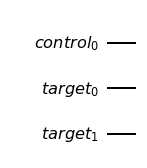

In [1]:
from qiskit import QuantumCircuit
from qiskit import QuantumRegister, QuantumCircuit
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu = QuantumCircuit(c, t, name="Controlled 13^x mod 35")

# इन पंक्तियों के बीच अपना कोड लिखें - स्टार्ट





# इन पंक्तियों के बीच अपना कोड लिखें - एन्ड 

cu.draw('mpl')

और अपना उत्तर जांचने के लिए नीचे दिए गए सेल को चलाएँ:

In [2]:
# निम्नलिखित कोड का उपयोग करके अपना उत्तर जांचें
from qc_grader import grade_ex2a
grade_ex2a(cu)

ModuleNotFoundError: No module named 'qc_grader'

बधाई हो! आपने कठिन हिस्सा पूरा कर लिया है।

हम क्यूबिट्स को मापकर चरण अनुमान एल्गोरिथ्म के आउटपुट को पढ़ते हैं, इसलिए हमें यह सुनिश्चित करने की आवश्यकता होगी कि हमारे 'गिनती' रजिस्टर में $r$ को पढ़ने के लिए पर्याप्त क्यूबिट्स हों। हमारे मामले में, $r = 4$, जिसका अर्थ है कि हमें केवल $\log_2(4) = 2$ क्यूबिट्स (फिर से धोखा देना क्योंकि हम $r$ पहले से जानते हैं) की आवश्यकता है, लेकिन चूंकि सैंटियागो में 5 क्यूबिट्स हैं, और हमने केवल उपयोग किया है 2 'टारगेट' रजिस्टर के लिए, हम अपने काउंटिंग रजिस्टर के रूप में शेष सभी 3 क्यूबिट्स का उपयोग करेंगे।

$U$ पर चरण अनुमान करने के लिए, हमें सर्किट बनाने की आवश्यकता है जो हमारे रजिस्टर में प्रत्येक qubit (इंडेक्स $x$ के साथ) के लिए $U^{2^x}$ ($U$ दोहराया $2^x$ बार) का प्रदर्शन करते हैं $n$ गिनती qubits। हमारे मामले में इसका मतलब है कि हमें तीन सर्किट की आवश्यकता है जो लागू हों:

$$ U, \; U^2, \; \text{and} \; U^4 $$

तो अगला कदम एक सर्किट बनाना है जो $U^2$ (यानी एक सर्किट $U$ को दो बार लागू करने के बराबर) करता है।

<div class="alert alert-block alert-success">

**Exercise 2b:** एक सर्किट बनाएं ($U^2$) जो परिवर्तन करता है:

$$
\begin{aligned}
U|00\rangle &= |10\rangle \\
U|01\rangle &= |11\rangle \\
U|10\rangle &= |00\rangle \\
U|11\rangle &= |01\rangle \\
\end{aligned}
$$

और एक अन्य क्यूबिट द्वारा नियंत्रित किया जाता है। सर्किट 'लक्ष्य' नामक 2-क्यूबिट लक्ष्य रजिस्टर पर कार्य करेगा, और 'कंट्रोल' नामक एक अन्य सिंगल-क्विबिट रजिस्टर द्वारा नियंत्रित किया जाएगा। आपको अपना तैयार सर्किट वेरिएबल '`cu2'' को असाइन करना चाहिए।
</div>

In [ ]:
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu2 = QuantumCircuit(c, t)

# इन पंक्तियों के बीच अपना कोड लिखें - स्टार्ट





# इन पंक्तियों के बीच अपना कोड लिखें - एन्ड 

cu2.draw('mpl')

और अपना उत्तर जांचने के लिए नीचे दिए गए सेल को चलाएँ:

In [ ]:
# निम्नलिखित कोड का उपयोग करके अपना उत्तर जांचें
from qc_grader import grade_ex2b
grade_ex2b(cu2)

अंत में, हमें एक ऐसे सर्किट की भी आवश्यकता है जो $U$ को चार बार लागू करने के बराबर हो (यानी हमें सर्किट $U^4$ की आवश्यकता है)।  

<div class="alert alert-block alert-success">
    
**Exercise 2c:** एक सर्किट बनाएं ($U^4$) जो परिवर्तन करता है:

$$
\begin{aligned}
U|00\rangle &= |00\rangle \\
U|01\rangle &= |01\rangle \\
U|10\rangle &= |10\rangle \\
U|11\rangle &= |11\rangle \\
\end{aligned}
$$

और एक अन्य क्यूबिट द्वारा नियंत्रित किया जाता है। सर्किट 'लक्ष्य' नामक 2-क्यूबिट लक्ष्य रजिस्टर पर कार्य करेगा, और 'कंट्रोल' नामक एक अन्य सिंगल-क्विबिट रजिस्टर द्वारा नियंत्रित किया जाएगा। आपको अपना तैयार सर्किट वेरिएबल '`cu4'' को असाइन करना चाहिए। _संकेत: सबसे अच्छा समाधान बहुत आसान है।_
</div>

In [ ]:
c = QuantumRegister(1, 'control')
t = QuantumRegister(2, 'target')
cu4 = QuantumCircuit(c, t)

# इन पंक्तियों के बीच अपना कोड लिखें - स्टार्ट





# इन पंक्तियों के बीच अपना कोड लिखें - एन्ड 

cu4.draw('mpl')

और अपना उत्तर जांचने के लिए नीचे दिए गए सेल को चलाएँ:

In [ ]:
# निम्नलिखित कोड का उपयोग करके अपना उत्तर जांचें
from qc_grader import grade_ex2c
grade_ex2c(cu4)

<div class="alert alert-block alert-success">

**Exercise 2 final:** अब हमने $U$, $U^2$ and $U^4$ को नियंत्रित कर लिया है, हम इसे एक सर्किट में जोड़ सकते हैं जो शोर के एल्गोरिथम के क्वांटम भाग को पूरा करता है।

आरंभीकरण भाग आसान है: हमें गिनती रजिस्टर को राज्य में रखना होगा |+++ put (जो हम तीन H-गेट्स के साथ कर सकते हैं) और हमें राज्य में होने के लिए लक्ष्य रजिस्टर की आवश्यकता है |1⟩ (जिसे हमने मैप किया है) कम्प्यूटेशनल आधार स्थिति के लिए |00⟩ , इसलिए हमें यहां कुछ भी करने की आवश्यकता नहीं है)। हम आपके लिए यह सब करेंगे।

आपका काम एक सर्किट बनाना है जो नियंत्रित करता है- s, जिसका उपयोग इनिशियलाइज़ेशन और व्युत्क्रम क्वांटम फूरियर ट्रांसफ़ॉर्म के बीच में किया जाएगा। अधिक औपचारिक रूप से, हम एक सर्किट चाहते हैं:


$$
CU_{c_0 t}CU^2_{c_1 t}CU^4_{c_2 t}
$$

जहां $c_0$, $c_1$ और $c_2$ 'गिनती' रजिस्टर में तीन qubits हैं, $t$ 'target' रजिस्टर है, और $U$ <a href="#u-definition"> के रूप में है इस अभ्यास के पहले भाग में परिभाषित किया गया है</a>। इस संकेतन में, $CU_{a b}$ का अर्थ है $CU$ को $a$ द्वारा नियंत्रित किया जाता है और $b$ पर कार्य करता है। इसका एक आसान उपाय यह है कि आप ऊपर बनाए गए सर्किट `cu`, `cu2` और `cu4` को जोड़ दें, लेकिन आपको एक अधिक कुशल सर्किट मिलेगा जिसमें समान व्यवहार हो!
    
</div>
<div class="alert alert-block alert-danger">
    
आपके सर्किट में केवल [CNOTs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.CXGate.html) और सिंगल क्यूबिट [U-gates](https://qiskit.org/documentation/) हो सकते हैं। स्टब्स/qiskit.circuit.library.UGate.html)। आपका स्कोर आपके द्वारा उपयोग किए जाने वाले CNOTs की संख्या होगी (कम बेहतर है), क्योंकि मल्टी-क्विबिट गेट्स आमतौर पर सिंगल-क्विबिट गेट्स की तुलना में हार्डवेयर पर अधिक कठिन होते हैं। यदि आप इस आवश्यकता से जूझ रहे हैं, तो हमने सबमिशन के आगे कोड की एक पंक्ति शामिल की है जो आपके सर्किट को इस फ़ॉर्म में बदल देगी, हालाँकि आपके हाथ से बेहतर करने की संभावना है।
    
</div>

In [ ]:
# आपके पिछले समाधानों को आपके अंतिम सबमिशन में संयोजित करने के लिए कोड
cqr = QuantumRegister(3, 'control')
tqr = QuantumRegister(2, 'target')
cux = QuantumCircuit(cqr, tqr)
solutions = [cu, cu2, cu4]
for i in range(3):
    cux = cux.compose(solutions[i], [cqr[i], tqr[0], tqr[1]])
cux.draw('mpl')

In [ ]:
# निम्नलिखित कोड का उपयोग करके अपना उत्तर जांचें
from qc_grader import grade_ex2_final
# यदि आपको अपने सर्किट को CNOTs और सिंगल-क्यूबिट गेट्स में बदलने की आवश्यकता है, तो नीचे दी गई दो पंक्तियों को अनकम्मेंट करें
#from qiskit import transpile
#cux = transpile(cux, basis_gates=['cx','u'])
grade_ex2_final(cux)

एक बार जब आप सर्किट से खुश हो जाते हैं, तो आप इसे नीचे सबमिट कर सकते हैं:

In [ ]:
# अपना उत्तर सबमिट करें। आप किसी भी समय पुनः सबमिट कर सकते हैं।
from qc_grader import submit_ex2_final
submit_ex2_final(cux)

बधाई हो! आपने अभ्यास समाप्त कर लिया है। यह देखने के लिए पढ़ें कि आपका सर्किट कारक 35 का उपयोग करता है, और देखें कि यह कैसा प्रदर्शन करता है।

## 35 को गुणनखंड करने के लिए अपने सर्किट का उपयोग करना

नीचे दिया गया कोड सेल अभ्यास के लिए आपका सबमिशन लेता है और इसका उपयोग एक सर्किट बनाने के लिए करता है जो हमें $\tfrac{s}{r}$ देगा, जहां $s$ $0$ और $r-1$ के बीच एक यादृच्छिक पूर्णांक है, और $r$ फ़ंक्शन की अवधि है $f(x) = 13^x \bmod 35$।

In [ ]:
from qiskit.circuit.library import QFT
from qiskit import ClassicalRegister
# सर्किट ऑब्जेक्ट बनाएं
cr = ClassicalRegister(3)
shor_circuit = QuantumCircuit(cqr, tqr, cr)

# क्यूबिट्स को इनिशियलाइज़ करें
shor_circuit.h(cqr)

# अपना सर्किट जोड़ें
shor_circuit = shor_circuit.compose(cux)

# उलटा QFT करें और आउटपुट निकालें
shor_circuit.append(QFT(3, inverse=True), cqr)
shor_circuit.measure(cqr, cr)
shor_circuit.draw('mpl')

आइए इस सर्किट को ट्रांसपाइल करें और देखें कि यह कितना बड़ा है, और यह कितने CNOT का उपयोग करता है:

In [ ]:
from qiskit import Aer, transpile
from qiskit.visualization import plot_histogram
qasm_sim = Aer.get_backend('aer_simulator')
tqc = transpile(shor_circuit, basis_gates=['u', 'cx'], optimization_level=3)
print(f"circuit depth: {tqc.depth()}")
print(f"circuit contains {tqc.count_ops()['cx']} CNOTs")

और देखते हैं कि हमें क्या मिलता है:

In [ ]:
counts = qasm_sim.run(tqc).result().get_counts()
plot_histogram(counts)

यह मानते हुए कि सब कुछ सही ढंग से काम कर रहा है, हमें $0$, $2$, $4$ और $8$ संख्याओं को मापने की समान संभावना देखनी चाहिए। ऐसा इसलिए है क्योंकि चरण अनुमान हमें $2^n \cdot \tfrac{s}{r}$ देता है, जहां $n$ हमारे गिनती रजिस्टर में qubits की संख्या है (यहां $n = 3$, $s$ एक यादृच्छिक पूर्णांक है $0$ और $r-1$ के बीच, और $r$ वह संख्या है जिसकी हम गणना करने का प्रयास कर रहे हैं)। आइए इन्हें भिन्नों में परिवर्तित करें जो हमें $s/r$ बताते हैं (यह कुछ ऐसा है जिसे हम आसानी से शास्त्रीय रूप से गणना कर सकते हैं):

In [ ]:
from fractions import Fraction
n = 3  # n हमारे 'गिनती' रजिस्टर में qubits की संख्या है
# प्रत्येक माप स्ट्रिंग के माध्यम से साइकिल
for measurement in counts.keys():
    # बाइनरी स्ट्रिंग को 'int' में बदलें, और 2^n . से विभाजित करें
    decimal = int(measurement, 2)/2**n
    # a/b के रूप में कनवर्ट करने के लिए निरंतर भिन्न एल्गोरिथम का उपयोग करें
    print(Fraction(decimal).limit_denominator())

हम देख सकते हैं कि कुछ परिणामों का हर हमें सही उत्तर $r = 4$ बताएगा। हम जल्दी से $r=4$ सत्यापित कर सकते हैं:

In [ ]:
13**4 % 35

तो हम इससे कारक कैसे प्राप्त करते हैं? फिर इस बात की बहुत अधिक संभावना है कि $N$ और या तो $a^{r/2}-1$ या $a^{r/2}+1$ का सबसे बड़ा सामान्य भाजक $N$ का एक गुणनखंड हो, और सबसे बड़ा सामान्य भाजक भी कुछ ऐसा है जिसे हम आसानी से शास्त्रीय रूप से गणना कर सकते हैं।

In [ ]:
from math import gcd # महत्तम सामान्य भाजक
for x in [-1, 1]:
    print(f"Guessed factor: {gcd(13**(4//2)+x, 35)}")

हमें केवल एक कारक खोजने की आवश्यकता है, और दूसरे कारक को खोजने के लिए $N$ को विभाजित करने के लिए इसका उपयोग कर सकते हैं। लेकिन इस मामले में, _both_ $a^{r/2}-1$ या $a^{r/2}+1$ हमें $35$ के गुणक देते हैं। हम फिर से सत्यापित कर सकते हैं कि यह सही है:

In [ ]:
7*5

## `ibmq_santiago` पर चल रहा है

हमने वादा किया था कि यह सैंटियागो पर चलेगा, इसलिए यहां हम आपको दिखाएंगे कि यह कैसे करना है। इस उदाहरण में हम सुविधा के लिए एक नकली सैंटियागो डिवाइस का उपयोग करेंगे, लेकिन आप चाहें तो इसे वास्तविक डिवाइस के लिए स्विच आउट कर सकते हैं:

In [ ]:
from qiskit.test.mock import FakeSantiago
from qiskit import assemble
from qiskit.visualization import plot_histogram
santiago = FakeSantiago()
real_device = False

## वास्तविक डिवाइस पर चलने के लिए इस कोड ब्लॉक को अनकम्मेंट करें
#from qiskit import IBMQ
#IBMQ.load_account()
#provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
#santiago = provider.get_backend('ibmq_santiago')
#real_device = True

# हमें सैंटियागो के लिए आगे बढ़ने की जरूरत है
tqc = transpile(shor_circuit, santiago, optimization_level=3)

if not real_device:
    tqc = assemble(tqc)

# सर्किट चलाएँ और काउंट प्रिंट करें
counts = santiago.run(tqc).result().get_counts()
plot_histogram(counts)

यदि आपका स्कोर काफी कम था, तो आपको यह देखना चाहिए कि हमारे पास $0$, $2$, $4$ या $8$ को मापने की उच्च संभावना है जैसा कि हमने सही सिमुलेशन के साथ देखा। प्रोसेसर में अशुद्धियों और हमारी क्वैबिट्स के साथ बातचीत करने वाली अवांछित चीजों के कारण आपको कुछ अतिरिक्त परिणाम दिखाई देंगे। यह 'शोर' हमारे सर्किट के लंबे समय तक खराब हो जाता है, क्योंकि लंबे समय तक गणना समय का मतलब अवांछित बातचीत के लिए अधिक समय है, और अधिक गेट्स का मतलब अधिक संभावित त्रुटियां हैं। यही कारण है कि हमें सबसे छोटा सर्किट संभव बनाने के लिए धोखा देने की जरूरत है।

निकट भविष्य में, हमारे क्वांटम सिस्टम में इतना सुधार होगा कि हम इन समस्याओं को दूर करने के लिए और अधिक उन्नत त्रुटि शमन तकनीकों का उपयोग करना शुरू कर सकते हैं, जिसका अर्थ यह होगा कि हम बड़े पर्याप्त सर्किट चला सकते हैं जो हम [बिना धोखा दिए शोर का एल्गोरिदम निष्पादित कर सकते हैं](https:// arxiv.org/pdf/quant-ph/0205095.pdf)।

## अतिरिक्त जानकारी

**के द्वारा बनाई गई:** फ्रैंक हार्किंस

**संस्करण:** 1.0.0